In [1]:
#Import necessory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the CSV data here and print head
df = pd.read_csv('breast cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#print summary
print ('Shape        ------>', df.shape)
print ('Each Column and data type and its count','\n')
print ( df.info())

Shape        ------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64


In [4]:
#DROP ALERT 1 : Unnamed:32 column has all nulls. Safe to remove the column.
df = df.drop(['Unnamed: 32'],axis=1)

In [5]:
# Dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Seems no other cols have nulls. It's safe to proceed.

In [6]:
# Validate each class to understand if the dataset is imbalanced.

print ('Total Belign Tumor (B)    :  {} and its percentage is {} %'.format(df.diagnosis.value_counts()[0], round(df.diagnosis.value_counts()[0]/df.diagnosis.value_counts().sum()*100,2)) )
print ('Total Malignant Tumor (M) :  {} and its percentage is {} %'.format(df.diagnosis.value_counts()[1], round(df.diagnosis.value_counts()[1]/df.diagnosis.value_counts().sum()*100,2)) )


Total Belign Tumor (B)    :  357 and its percentage is 62.74 %
Total Malignant Tumor (M) :  212 and its percentage is 37.26 %


Dataset is not imbalanced, we are good to proceed.

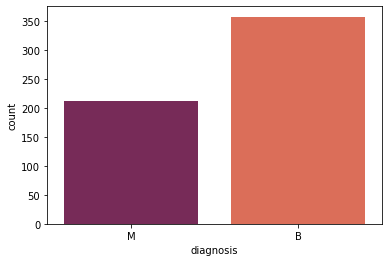

In [7]:
#Plot each class freequency
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=df,palette='rocket')

In [8]:
df.shape

(569, 31)

`Diagnosis is a labelled data and has 2 classes 'M' (Malignant) and 'B' (Belign) tumor.`
- As there are many features, let's try to see if we can reduce the features using different techniques
- Let's plot heatmap to visualize and find the coefficient of multicollinearity

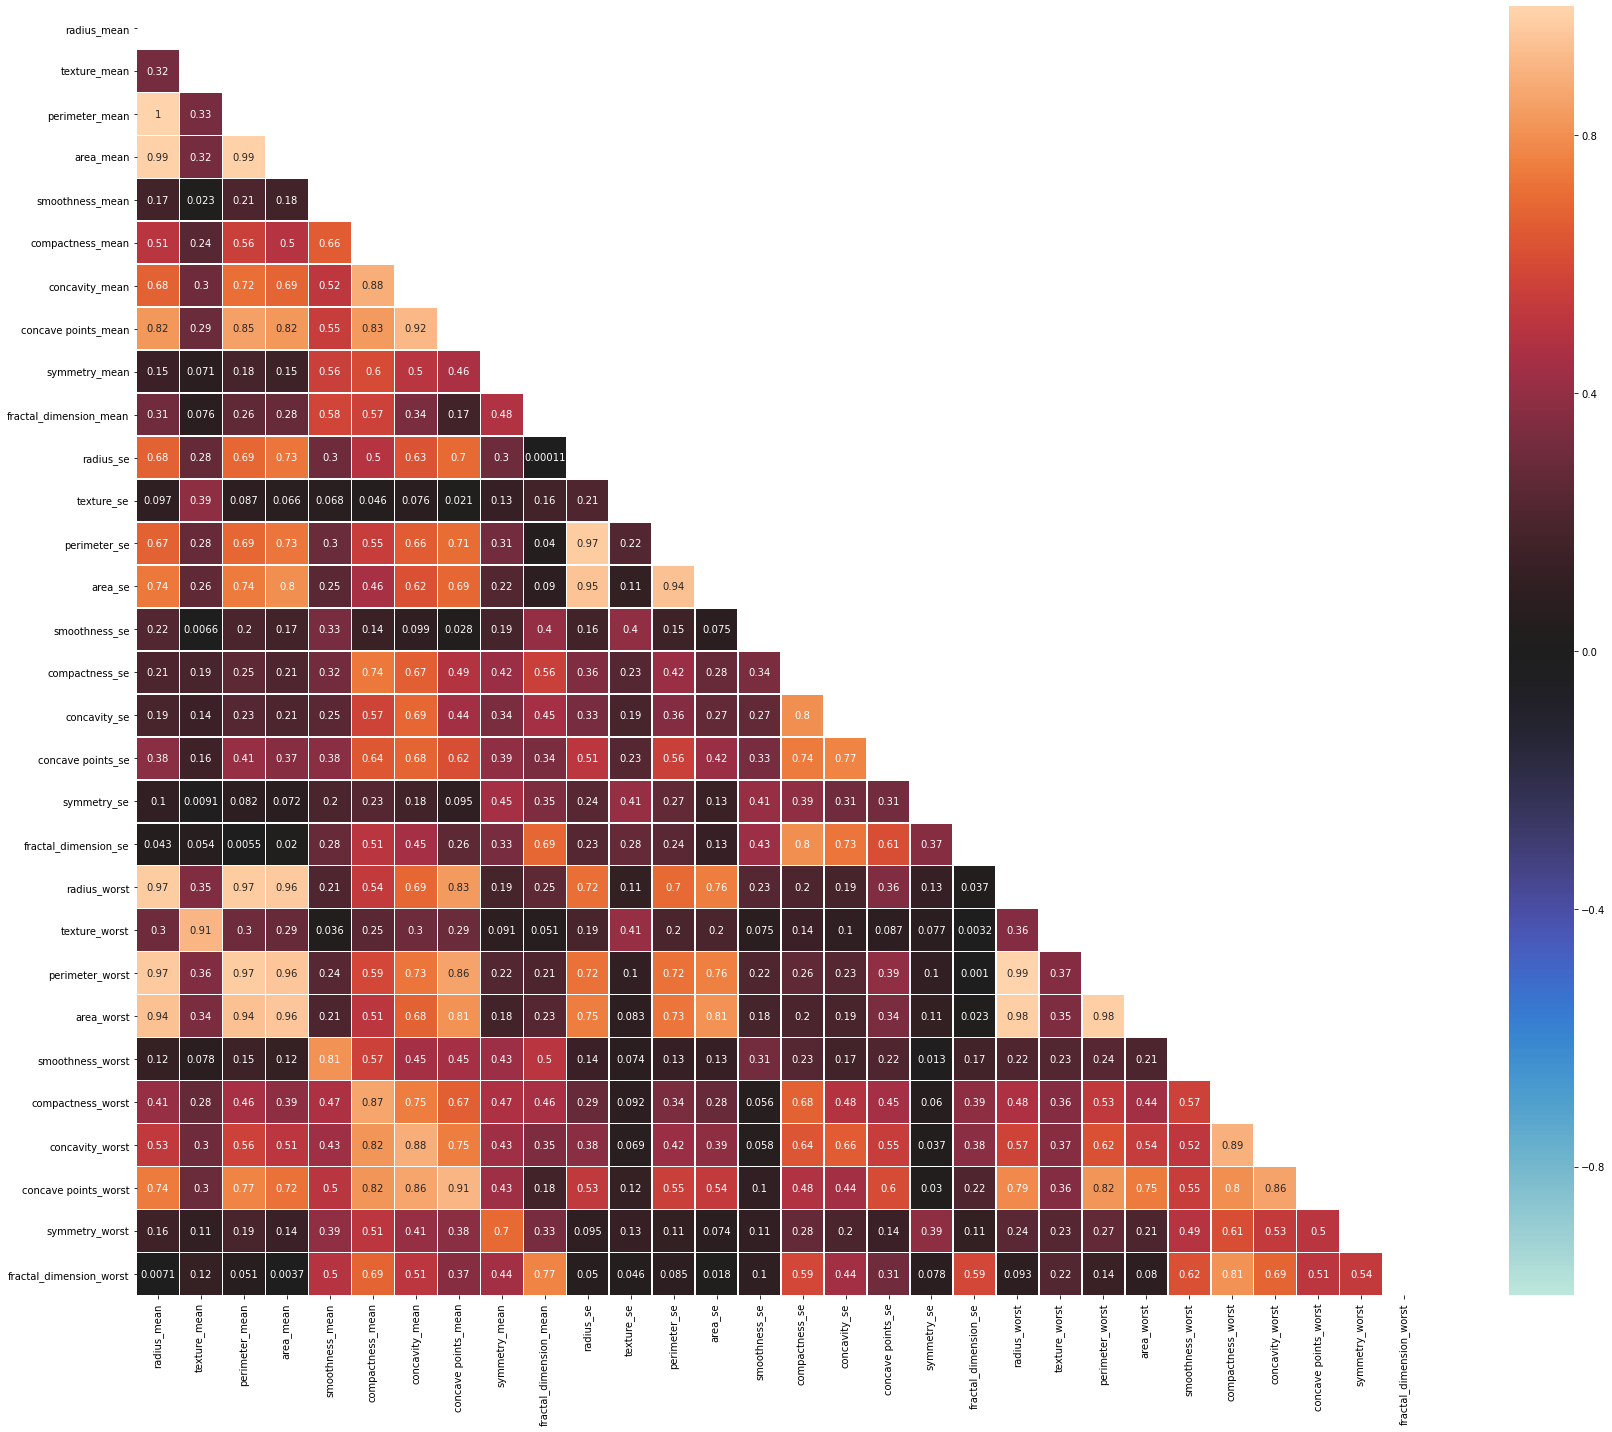

In [9]:
df_corr = df.corr().abs()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 20))
sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True,
            square=True, center=0, linewidths=.5)
plt.tight_layout()

In [10]:
#Shape of df_corr
print ('Correlation matrix Shape =  ', df_corr.shape)

Correlation matrix Shape =   (30, 30)


`As we can see each feature data scaled differently. Let's go ahead and scale the data`

In [11]:
scaler = StandardScaler()
X = df.drop('diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)

Using heatmap we got to know there are many features have colinearity. We are going to use PCA to pick top components which can explain maximum variance.

In [12]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

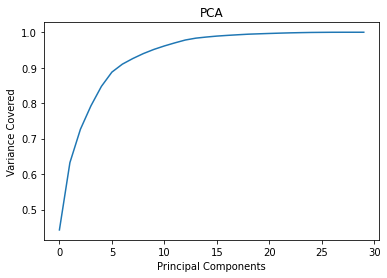

In [13]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Around 13 Principal Components are able to explain > 95 % variance. Its safe to consider starting 13 PC's

In [14]:
pca = PCA(n_components=13)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC7','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC7,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262954,-0.859016,0.103391
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711904,1.106996,0.813118,0.157934,-0.943529
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454276,-0.605603,0.124393,-0.410631
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405439,-1.116975,-1.151513,1.011322,-0.933274
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377704,0.651360,-0.110526,0.387950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256988,-0.062650,0.123337,-0.051726
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108633,0.244804,0.222751,-0.192637
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520879,-0.840513,0.096490,0.157414
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542034,-0.089295,-0.178627,-0.697449,1.225187


In [15]:
#Replace Label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [16]:
y = df['diagnosis']

In [17]:
# Buidling model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size = 0.25, random_state= 355)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [18]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



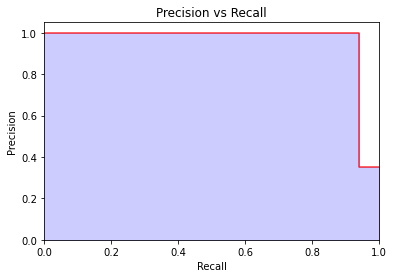

In [24]:
# Plot Precision vs Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='r', alpha=0.8,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [20]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[93,  0],
       [ 3, 47]], dtype=int64)

In [21]:
tp = cfm[0,0]
fp = cfm[0,1]
fn = cfm[1,0]
tn = cfm[1,1]
print ('True Positive  >', tp)
print ('False Positive >', fp)
print ('False Negetive >', fn)
print ('True Negetive  >', tn)

True Positive  > 93
False Positive > 0
False Negetive > 3
True Negetive  > 47


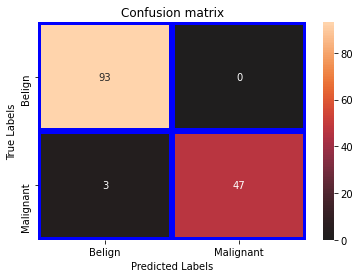

In [22]:
# plot confusion matrix heatmap
ax=plt.subplot()
sns.heatmap(cfm,annot=True,ax=ax,linewidths=5,linecolor='b',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Belign','Malignant'])
ax.yaxis.set_ticklabels(['Belign','Malignant'])
plt.show()

In [23]:
print ('Final prediction >', round((tp+tn)/(len(y_pred))*100,2))

Final prediction > 97.9
